In [131]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

### Load Data

In [132]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
y_test=pd.read_csv('titanic/gender_submission.csv')

### Exploratory Data Analysis (EDA)  

In [133]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


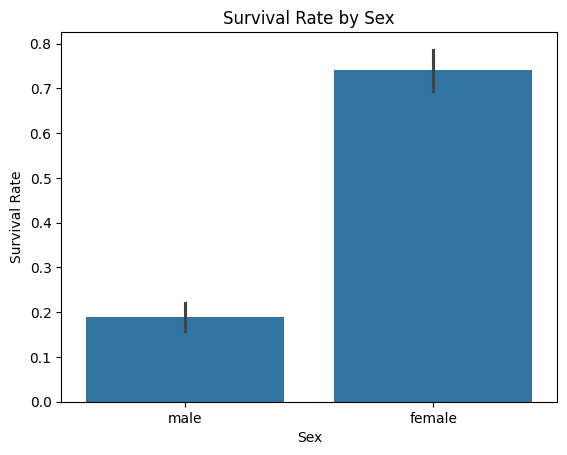

In [135]:
import seaborn as sns

sns.barplot(data=train, x='Sex', y='Survived')
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

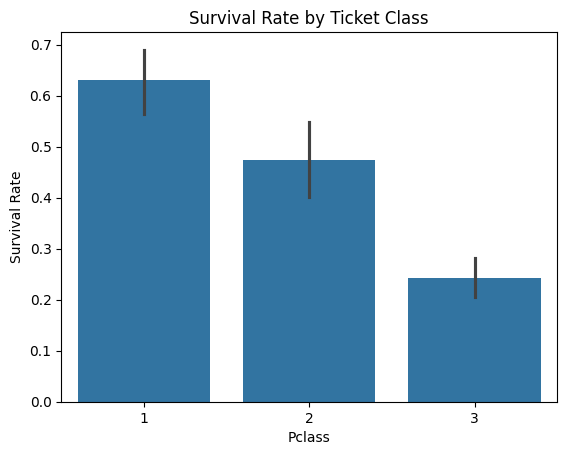

In [136]:
sns.barplot(data=train, x='Pclass', y='Survived')
plt.title("Survival Rate by Ticket Class")
plt.ylabel("Survival Rate")
plt.show()

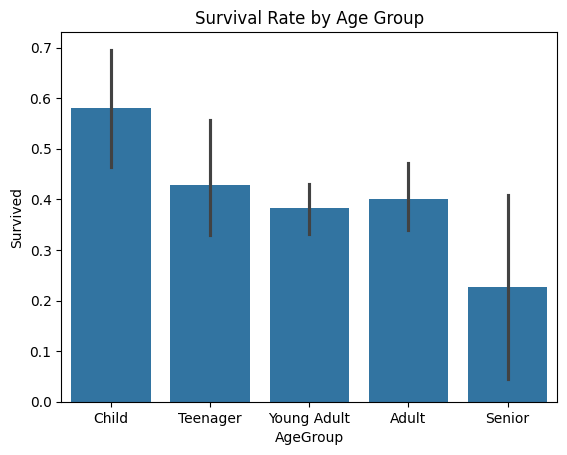

In [137]:
bins = [0, 12, 18, 35, 60, 80]   # defining age bins
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

sns.barplot(
    data=train.assign(
        AgeGroup = pd.cut(train['Age'], bins=bins, labels=labels, include_lowest=True)
    ),
    x='AgeGroup', y='Survived', order=labels
)
plt.title("Survival Rate by Age Group")
plt.show()

#train_temp[['Age', 'AgeGroup']].head(10)

In [138]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train[['Name', 'Title']].head(10)

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [139]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [140]:
train['Title'] = train['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Countess': 'Royalty',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'Don': 'Royalty',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Major': 'Officer',
    'Col': 'Officer',
    'Capt': 'Officer',
    'Jonkheer': 'Royalty'
})

In [141]:
train['Title'].value_counts()

Title
Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royalty      5
Name: count, dtype: int64

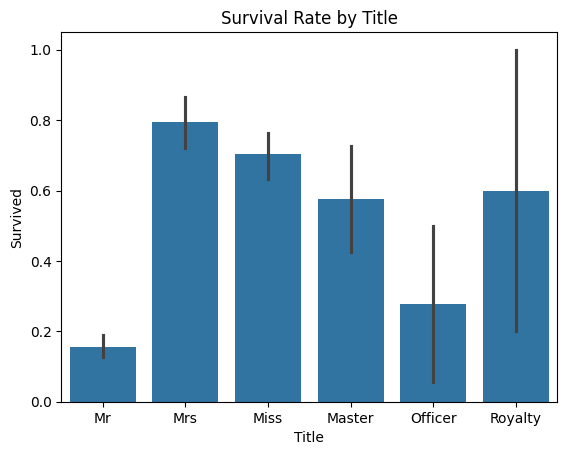

In [142]:
sns.barplot(data=train, x='Title', y='Survived', order=['Mr', 'Mrs', 'Miss', 'Master', 'Officer', 'Royalty'])
plt.title('Survival Rate by Title')
plt.show()

In [143]:
X_train=train.drop(columns=['Survived','Name','PassengerId','Cabin','Ticket'])

In [144]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [145]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Countess': 'Royalty',
    'Lady': 'Royalty',
    'Sir': 'Royalty',
    'Don': 'Royalty',
    'Dona': 'Royalty',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Major': 'Officer',
    'Col': 'Officer',
    'Capt': 'Officer',
    'Jonkheer': 'Royalty'
})
test['Title'].value_counts()

Title
Mr         240
Miss        79
Mrs         72
Master      21
Officer      5
Royalty      1
Name: count, dtype: int64

In [146]:
X_test=test.drop(columns=['Name','PassengerId','Cabin','Ticket'])

In [147]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Title     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [148]:
y_train = train['Survived']
y_test = y_test['Survived']

### Data Preprocessing

In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [150]:
categorical_features = ['Sex','Title']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [151]:
Embarked_features = ['Embarked']
Embarked_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                ])

In [152]:
numerical_features = ['Age']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [153]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('emb', Embarked_transformer, Embarked_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

### Model Building

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [155]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "linear SVM": LinearSVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}
classifier_results = {}


In [156]:
X_train.shape , y_train.shape  ,X_test.shape, y_test.shape

((891, 8), (891,), (418, 8), (418,))

In [157]:
for model_name, model in models.items():
    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    print(f"Fitting {model_name}...")
    pipeline.fit(X_train,y_train)
    
    # Evaluate the model
    print(f"Scoring {model_name}...")
    score = pipeline.score(X_test, y_test)
    classifier_results[model_name] = score
print(classifier_results)


Fitting Logistic Regression...
Scoring Logistic Regression...
Fitting Random Forest...
Scoring Random Forest...
Fitting SVM...
Scoring SVM...
Fitting linear SVM...
Scoring linear SVM...
Fitting KNN...
Scoring KNN...
Fitting XGBoost...
Scoring XGBoost...
{'Logistic Regression': 0.9521531100478469, 'Random Forest': 0.868421052631579, 'SVM': 0.6483253588516746, 'linear SVM': 0.9497607655502392, 'KNN': 0.9066985645933014, 'XGBoost': 0.8827751196172249}


### Evaluating the Best Model

In [158]:
LogisticRegression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',LogisticRegression())
])  

LogisticRegression_pipeline.fit(X_train,y_train)

y_pred = LogisticRegression_pipeline.predict(X_test)

type(y_pred)

numpy.ndarray

In [159]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [160]:
confusion_matrix(y_test, y_pred)

array([[246,  20],
       [  0, 152]])

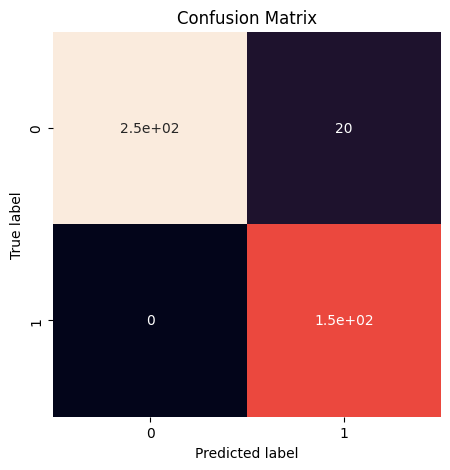

In [161]:
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()
    
    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_confusion_matrix(y_test, y_pred)   

In [162]:
precision_score(y_test, y_pred)

0.8837209302325582

In [163]:
recall_score(y_test, y_pred)

1.0

In [164]:
f1_score(y_test, y_pred)

0.9382716049382716